In [241]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Read in the data
df = pd.read_csv('randomForests.csv')
# Get it ready for use
df['PrecipIn'] = df['PrecipIn'].astype(int)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("TotalMinutes", axis=1, inplace=True)
# Copy output into y
y = df.iloc[:,2]
df.drop("MinCategorize", axis=1, inplace=True)
df.drop("NumRides", axis=1, inplace=True)
df.drop("Date", axis=1, inplace=True)
# Copy input into x
#X = df.iloc[:,0:6]
X = df.iloc[:,0:5]

In [242]:
# Set up the random forest classifier
forest = RandomForestClassifier(n_estimators=7, random_state=2)

In [243]:
# Split the data, 33% for testing, 66% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

In [244]:
# Feed the data in to produce a classifier
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.361


In [245]:
# Graph the importance of the features
n_features = df.shape[1]
#names = np.array(['NumRides', 'PrecipIn', 'Weekdays', 'Humidity', 'Temperature', 'CloudCover'])
names = np.array(['PrecipIn', 'Weekdays', 'Humidity', 'Temperature', 'CloudCover'])
forest.feature_importances_

array([ 0.03667566,  0.25903469,  0.2346878 ,  0.21359957,  0.25600228])

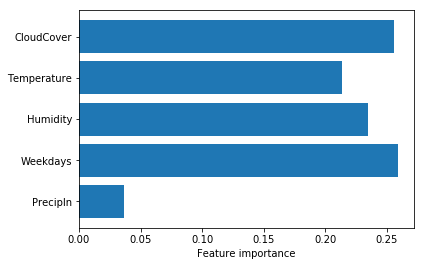

In [246]:
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), names)
plt.xlabel("Feature importance")

In [247]:
from sklearn import tree
i_tree = 0
for tree_in_forest in forest.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1